<a href="https://colab.research.google.com/github/cmd0850/Chislovy_metodi/blob/main/%D0%B4%D0%BE%D0%B4%D0%B7%D0%B0%D0%B2%D0%B4_%D0%94%D0%B6%D0%B5%D0%BD%D1%87%D0%B0%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
xi 0.0 0.2 0.5 0.9 1.3 1.6
yi 0.000000 0.182322 0.405465 0.641854 0.832909 0.955511

In [ ]:
Інтерполяційний член

In [40]:

import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand
from math import factorial

In [41]:
x=np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6], dtype=float)
y=np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511], dtype=float)
x1, x2, x3, x4 = 0.4, 0.6, 0.8, 1.0 # точки, в якій потрібно обчислити значення

def lagrange_interpolation(x, y, x_test):
    n = len(x)
    p = np.zeros(n) # масив для зберігання значень багаточленів L_i
    for i in range(n):
        # обчислюємо багаточлен L_i, який складається з n членів
        # кожен член дорівнює  (x-x_j)/(x_i-x_j) для j=0..n, j!=i
        p_i = 1
        for j in range(n):
            if i != j:
                p_i *= (x_test - x[j])/(x[i] - x[j])
        p[i] = p_i
    return np.dot(y, p) # повертаємо значення багаточлена

# обчислюємо інтерполяційний багаточлен та його значення у точці x_test
f1 = lagrange_interpolation(x, y, x1)
print("Значення функції у точці x_1 =", f1.round(4))

f2 = lagrange_interpolation(x, y, x2)
print("Значення функції у точці x_2 =", f2.round(4))

f3 = lagrange_interpolation(x, y, x3)
print("Значення функції у точці x_3 =", f3.round(4))

f4 = lagrange_interpolation(x, y, x4)
print("Значення функції у точці x_4 =", f4.round(4))



Значення функції у точці x_1 = 0.3365
Значення функції у точці x_2 = 0.47
Значення функції у точці x_3 = 0.5877
Значення функції у точці x_4 = 0.6932


/tmp/ipython-input-1271285360.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1,f1,'ro', label="Точки х_1, х_2, х_3, х_4", color='yellow')
/tmp/ipython-input-1271285360.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x2,f2,'ro', color='yellow')
/tmp/ipython-input-1271285360.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x3,f3,'ro', color='yellow')
/tmp/ipython-input-1271285360.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x4,f4,'ro', color='yellow')


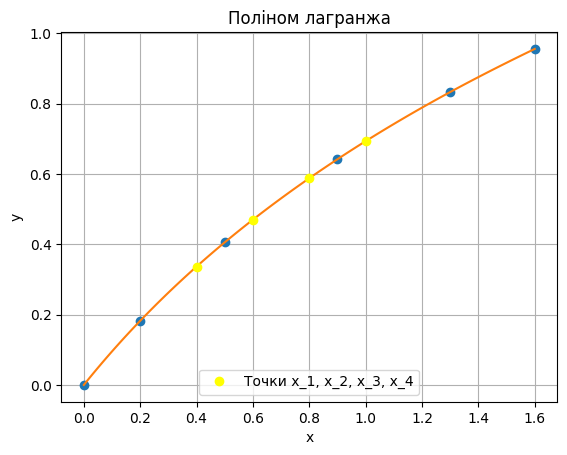

In [42]:
xnew=np.linspace(np.min(x),np.max(x),100) #точки, за якими будуємо графік
ynew=[lagrange_interpolation(x,y,i) for i in xnew]

plt.plot(x,y,'o',xnew,ynew) #будуємо графік функції Лагранжа

plt.plot(x1,f1,'ro', label="Точки х_1, х_2, х_3, х_4", color='yellow')
plt.plot(x2,f2,'ro', color='yellow')
plt.plot(x3,f3,'ro', color='yellow')
plt.plot(x4,f4,'ro', color='yellow')


plt.xlabel('x')
plt.ylabel('y')

plt.title('Поліном лагранжа')
plt.grid(True)
plt.legend(loc='lower center')
plt.show()



Інтерполяційний член Ньютона

In [43]:

#import numpy as np
#from math import factorial

# задані точки
x = np.array([0.2, 0.4, 0.6, 0.8, 1.0])  # це той самий многочлен, але взяті рівновіддалені точки
y = np.array([0.182322, 0.3365, 0.47, 0.5877, 0.6932])

# Друга інтерполяційна формула Ньютона (інтерполяція назад)
def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами (він має бути однаковим)

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    # Обчислення значення q
    q = (x0 - x[-1]) / h

    # Використання формули Ньютона для інтерполяції назад
    ans = delta_y[-1, 0]  # Починаємо з y_n
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q + i - 1)  # Обчислення добутку q*(q+1)*(q+2)*...*(q+i-1)
        ans += (q_prod * delta_y[n-i-1, i]) / factorial(i)

    return ans

# Обчислюємо значення функції в точці x = 0.9
x2 = 0.9 #точка в кінці відрізка
y2 = newton_backward_interpolation(x, y, x2)

print(f"f({x2}) = {y2}")


f(0.9) = 0.641799921875


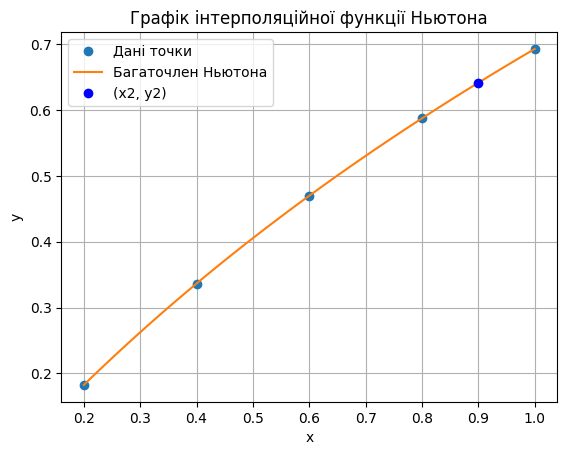

In [44]:
import matplotlib.pyplot as plt

# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
        yy[i] = newton_backward_interpolation(x, y, xx[i])

plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label="Багаточлен Ньютона")
plt.plot(x2, y2, 'bo', label='(x2, y2)')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


Ряд Тейлора

          4          3         2
-0.03328 x + 0.1682 x - 0.427 x + 0.984 x + 0.00131


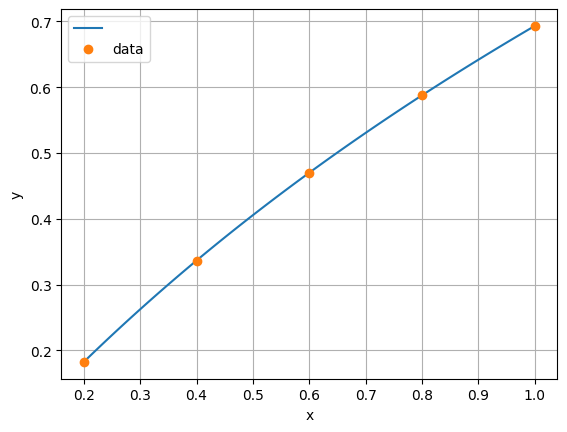

In [45]:
# Таблиця значень функції
x = np.array([0.2, 0.4, 0.6, 0.8, 1.0])  # це той самий многочлен, але взяті рівновіддалені точки
y = np.array([0.182322, 0.3365, 0.47, 0.5877, 0.6932])
# Інтерполяційний поліном Лагранжа
p =lagrange(x, y)
print(p)

# Формуємо точки для відображення полінома
z = np.linspace(np.min(x), np.max(x), 100)

# Відображаємо поліном та задані точки
plt.plot(z,p(z),'-')
plt.plot(x,y,'o')
plt.legend([' ','data'])
plt.grid(True)
plt.xlabel('x'); plt.ylabel('y'); plt.show()


#Я взяв це для визначення відповідної формули -0.03328 x + 0.1682 x - 0.427 x + 0.984 x + 0.00131

f'(x) = 0.691920000000000
f''(x) = 0
f'''(x) = 0
f''''(x) = 0
f(0) = 0.001
T(x) = 0.69192*x + 0.00131


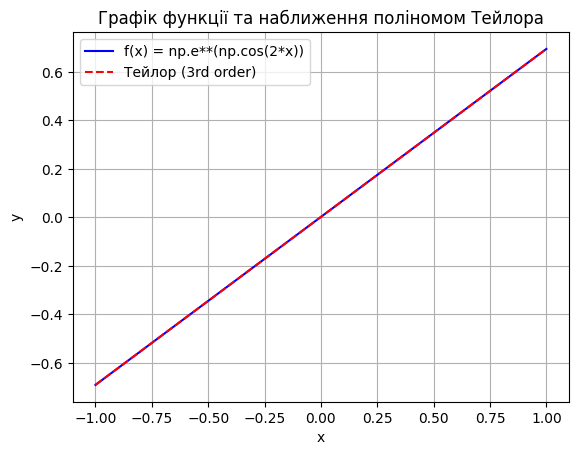

In [46]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Задаємо символьну змінну x та функцію f(x)
x = sp.symbols('x')
#f = sp.cos(3*x - 1) + x
f = -0.03328*x + 0.1682*x - 0.427*x + 0.984*x + 0.00131

# Знаходимо перші три похідні
f1 = sp.diff(f, x)
f2 = sp.diff(f1, x)
f3 = sp.diff(f2, x)
f4 = sp.diff(f3, x)

# Виводимо похідні
print("f'(x) =", f1)
print("f''(x) =", f2)
print("f'''(x) =", f3)
print("f''''(x) =", f4)

# Знаходимо значення функції та її похідних в точці x=0
x0 = 0
f_x0 = f.subs(x, x0).evalf()
f1_x0 = f1.subs(x, x0).evalf()
f2_x0 = f2.subs(x, x0).evalf()
f3_x0 = f3.subs(x, x0).evalf()

# Обчислюємо значення полінома Тейлора в точці x=0
T = f_x0 + f1_x0*(x-x0) + (f2_x0/2)*(x-x0)**2 + (f3_x0/6)*(x-x0)**3

# Виводимо значення функції та її наближення за поліномом Тейлора в точці x=0
print("f(0) =", f_x0.round(3))
print("T(x) =",T.evalf())

# Будуємо графіки
x_vals = np.linspace(-1, 1, 1000)
f_vals = np.array([f.subs(x, xi).evalf() for xi in x_vals])
T_vals = np.array([T.subs(x, xi).evalf() for xi in x_vals])

fig, ax = plt.subplots()
ax.plot(x_vals, f_vals, label='f(x) = np.e**(np.cos(2*x))', color='blue')
ax.plot(x_vals, T_vals, label='Тейлор (3rd order)', color='red', linestyle='--')
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Графік функції та наближення поліномом Тейлора")
plt.grid(True)
plt.show()

кубічний слайн

In [47]:
from scipy.interpolate import CubicSpline

# Вхідні дані
x = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])

# Побудова кубічного сплайну
cs = CubicSpline(x, y)

# Виведення коефіцієнтів сплайну для кожного відрізка
for i in range(len(x)-1):
    coeffs = cs.c[:, i]  # Коефіцієнти для i-го інтервалу
    spline = f'S_{i+1}(x) = {coeffs[0]:.4f}*(x - {x[i]})^3 + {coeffs[1]:.4f}*(x - {x[i]})^2 + {coeffs[2]:.4f}*(x - {x[i]}) + {coeffs[3]:.4f}'
    print(spline)

S_1(x) = 0.1524*(x - 0.0)^3 + -0.4423*(x - 0.0)^2 + 0.9940*(x - 0.0) + 0.0000
S_2(x) = 0.1524*(x - 0.2)^3 + -0.3508*(x - 0.2)^2 + 0.8353*(x - 0.2) + 0.1823
S_3(x) = 0.0653*(x - 0.5)^3 + -0.2137*(x - 0.5)^2 + 0.6660*(x - 0.5) + 0.4055
S_4(x) = 0.0334*(x - 0.9)^3 + -0.1353*(x - 0.9)^2 + 0.5264*(x - 0.9) + 0.6419
S_5(x) = 0.0334*(x - 1.3)^3 + -0.0952*(x - 1.3)^2 + 0.4342*(x - 1.3) + 0.8329


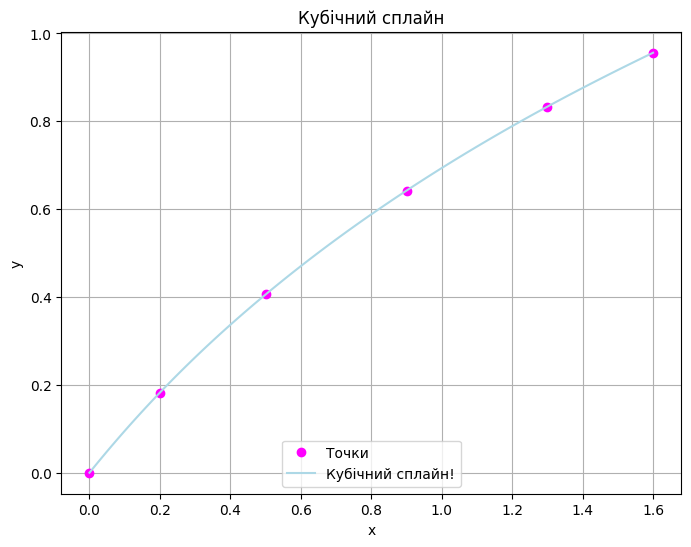

In [48]:
# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки', color='magenta')
plt.plot(x_new, y_new, label='Кубічний сплайн!', color='lightblue') #кольори змінени на жовтий та пурпуров
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend(loc='lower center')
plt.grid(True)
plt.show()